## Set up Bigquery Database

In [1]:
import pandas as pd
import pandas_gbq

In [50]:
df = pd.read_csv('Dataset Real Estate.csv', index_col=0)
df.shape

(208150, 9)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 208150 entries, 0 to 208149
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Address   208150 non-null  object 
 1   Beds      202309 non-null  object 
 2   Baths     208150 non-null  object 
 3   Area      169131 non-null  object 
 4   Price     207681 non-null  float64
 5   Street    208150 non-null  object 
 6   District  208150 non-null  object 
 7   City      208150 non-null  object 
 8   Zip Code  208150 non-null  object 
dtypes: float64(1), object(8)
memory usage: 15.9+ MB


In [52]:
df.head()

,Address,Beds,Baths,Area,Price,Street,District,City,Zip Code
0,"4-74 48th Ave #9K, Long Island City, NY 11109",1,1,700,555000.0,4-74 48th Ave #9K,Long Island City,NY,11109
1,"469 E 49th St #6, Brooklyn, NY 11203",10,6,NaN,1250000.0,469 E 49th St #6,Brooklyn,NY,11203
2,"715 Avenue L, Brooklyn, NY 11230",8,6,"2,015",1690000.0,715 Avenue L,Brooklyn,NY,11230
3,"223 E 62nd St, New York, NY 10065",5,6,"3,750",7995000.0,223 E 62nd St,New York,NY,10065
4,"1824 E 17th St #B2, Brooklyn, NY 11229",2,2,888,579000.0,1824 E 17th St #B2,Brooklyn,NY,11229


In [53]:
df.columns = ['Address', 'Beds', 'Baths', 'Area', 'Price', 'Street', 'District',
       'City', 'Zip_Code']

In [54]:
df['Area'] = df['Area'].str.replace(',', '')
df['Area'] = df['Area'].str.split(" ", n=1, expand=True)[0]

In [59]:
df_clean=df.where(df.Area != r'n/a')
df_clean=df_clean.where(df.Baths != r'n/')
df_clean=df_clean.drop_duplicates()
df_clean=df_clean.dropna()
df_clean.head()

,Address,Beds,Baths,Area,Price,Street,District,City,Zip_Code
0,"4-74 48th Ave #9K, Long Island City, NY 11109",1,1,700,555000.0,4-74 48th Ave #9K,Long Island City,NY,11109
2,"715 Avenue L, Brooklyn, NY 11230",8,6,2015,1690000.0,715 Avenue L,Brooklyn,NY,11230
3,"223 E 62nd St, New York, NY 10065",5,6,3750,7995000.0,223 E 62nd St,New York,NY,10065
4,"1824 E 17th St #B2, Brooklyn, NY 11229",2,2,888,579000.0,1824 E 17th St #B2,Brooklyn,NY,11229
5,"335-341 Nostrand Avenue UNIT 401-A, Brooklyn, ...",1,1,469,539000.0,335-341 Nostrand Avenue UNIT 401-A,Brooklyn,NY,11216


In [60]:
df_clean['Area'] = df_clean['Area'].astype('int')
df_clean['Baths'] = df_clean['Baths'].astype('int')

In [61]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3472 entries, 0 to 208149
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Address   3472 non-null   object 
 1   Beds      3472 non-null   object 
 2   Baths     3472 non-null   int32  
 3   Area      3472 non-null   int32  
 4   Price     3472 non-null   float64
 5   Street    3472 non-null   object 
 6   District  3472 non-null   object 
 7   City      3472 non-null   object 
 8   Zip_Code  3472 non-null   object 
dtypes: float64(1), int32(2), object(6)
memory usage: 244.1+ KB


In [62]:
df_clean.shape

(3472, 9)

In [63]:
project_id = 'latihan-345909'
table_id = 'latihan-345909.real_estate.test_1'

In [64]:
pandas_gbq.to_gbq(df_clean, table_id, project_id=project_id,if_exists='append')

1it [00:06,  7.00s/it]


## Scrape New Data

In [ ]:
from bs4 import BeautifulSoup
import requests
import numpy as np
import urllib.parse 

headers = ({
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/104.0.5112.81 Safari/537.36 Edg/104.0.1293.54'})

address = []
beds = []
baths = []
areas = []
prices = []

web = ['https://www.trulia.com/NY/New_York/',
       'https://www.trulia.com/CA/Los_Angeles/',
       'https://www.trulia.com/IL/Chicago/',
       'https://www.trulia.com/AZ/Phoenix/',
       'https://www.trulia.com/NV/Las_Vegas/']

for h in web:
    for i in range(1, pages + 1):
        website = requests.get(h + str(i) + '_p/', headers=headers)

        soup = BeautifulSoup(website.content, 'html.parser')

        result = soup.find_all('div',
                       {'data-testid': 'property-card-details'})

        result_update = [k for k in result if k.has_attr('data-testid')]

        for result in result_update:

            try:
                address.append(result.find('div', {'data-testid': 'property-address'}).get_text())
            except:
                address.append("n/a")

            try:
                beds.append(result.find('div', {'data-testid': 'property-beds'}).get_text())
            except:
                beds.append("n/a")

            try:
                baths.append(result.find('div', {'data-testid': 'property-baths'}).get_text())
            except:
                baths.append("n/a")

            try:
                areas.append(result.find('div', {'data-testid': 'property-floorSpace'}).get_text())
            except:
                areas.append("n/a")

            try:
                prices.append(result.find('div', {'data-testid': 'property-price'}).get_text())
            except:
                prices.append("n/a")


real_estate_new = pd.DataFrame(list(zip(address, beds, baths, areas, prices)), columns=['Address', 'Beds', 'Baths', 'Area', 'Price'])

df_dict = real_estate_new.to_dict('dict')


In [19]:
real_estate_new['Beds'] = real_estate_new['Beds'].apply(lambda x: x.strip('bd'))
real_estate_new['Baths'] = real_estate_new['Baths'].apply(lambda x: x.strip('ba'))
real_estate_new['Price'] = real_estate_new['Price'].apply(lambda x: x.strip('$'))
real_estate_new['Price'] = real_estate_new['Price'].apply(lambda x: x.replace(",",""))
real_estate_new['Price'] = real_estate_new['Price'].apply(lambda x: x.replace("+",""))
real_estate_new['Area'] = real_estate_new['Area'].apply(lambda x: x.replace(" sqft",""))

real_estate_new['Street']=real_estate_new['Address'].apply(lambda x: x.split(',')[0])
real_estate_new['District']=real_estate_new['Address'].apply(lambda x: x.split(',')[1])
real_estate_new['City']=real_estate_new['Address'].apply(lambda x: x.split(',')[2].split(' ')[1])
real_estate_new['Zip_Code']=real_estate_new['Address'].apply(lambda x: x.split(',')[2].split(' ')[2])

In [20]:
real_estate_new['Area'] = real_estate_new['Area'].str.replace(',', '')
real_estate_new['Area'] = real_estate_new['Area'].str.split(" ", n=1, expand=True)[0]

In [70]:
real_estate_clean=real_estate_new.where(real_estate_new.Area != r'n/a')
real_estate_clean=real_estate_clean.where(real_estate_clean.Baths != r'n/')
real_estate_clean=real_estate_clean.where(real_estate_clean.Price != r'')
real_estate_clean=real_estate_clean.drop_duplicates()
real_estate_clean=real_estate_clean.dropna()
real_estate_clean.head()

,Address,Beds,Baths,Area,Price,Street,District,City,Zip_Code
0,"1371 Edwards Ave, Bronx, NY 10461",3,2,1800,698000,1371 Edwards Ave,Bronx,NY,10461
4,"730 E 95th St, Brooklyn, NY 11236",5,3,2700,999000,730 E 95th St,Brooklyn,NY,11236
5,"3751 86th St #3, Jackson Heights, NY 11372",1,1,800,258000,3751 86th St #3,Jackson Heights,NY,11372
6,"44 E 67th St #4D, New York, NY 10065",1,1,874,1495000,44 E 67th St #4D,New York,NY,10065
7,"190 22nd St #2, Brooklyn, NY 11232",9,9,6200,3500000,190 22nd St #2,Brooklyn,NY,11232


In [71]:
real_estate_clean['Area'] = real_estate_clean['Area'].astype('int')
real_estate_clean['Baths'] = real_estate_clean['Baths'].astype('int')
real_estate_clean['Price'] = real_estate_clean['Price'].astype('float64')

In [72]:
real_estate_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1713 entries, 0 to 50999
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Address   1713 non-null   object 
 1   Beds      1713 non-null   object 
 2   Baths     1713 non-null   int32  
 3   Area      1713 non-null   int32  
 4   Price     1713 non-null   float64
 5   Street    1713 non-null   object 
 6   District  1713 non-null   object 
 7   City      1713 non-null   object 
 8   Zip_Code  1713 non-null   object 
dtypes: float64(1), int32(2), object(6)
memory usage: 120.4+ KB


### Load initial Target Data

In [73]:
from google.cloud import bigquery
from google.oauth2 import service_account
credentials = service_account.Credentials.from_service_account_file(
'latihan-345909-d057684ecb42.json')

project_id = 'latihan-345909'
client = bigquery.Client(credentials= credentials,project=project_id)

In [74]:
sql = """
   SELECT *
   FROM real_estate.test_1
   """

df = client.query(sql).to_dataframe()
df.head()

,Address,Beds,Baths,Area,Price,Street,District,City,Zip_Code
0,"2014 2nd Ave #BB, New York, NY 10029",24,8,6000,2500000.0,2014 2nd Ave #BB,New York,NY,10029
1,"825 Riverside Dr, New York, NY 10032",9,4,4100,1995000.0,825 Riverside Dr,New York,NY,10032
2,"345 E 62nd St, New York, NY 10065",10,9,9453,9500000.0,345 E 62nd St,New York,NY,10065
3,"1902 8th Ave #1, Brooklyn, NY 11215",19,8,5890,3500000.0,1902 8th Ave #1,Brooklyn,NY,11215
4,"144 14th St, Brooklyn, NY 11215",12,4,2100,2399000.0,144 14th St,Brooklyn,NY,11215


In [75]:
df.dropna(inplace=True)

In [76]:
df.shape

(3472, 9)

### Detect Changes in data by comparing source and target

In [77]:
df.apply(tuple,1)

0       (2014 2nd Ave  #BB, New York, NY 10029, 24, 8,...
1       (825 Riverside Dr, New York, NY 10032, 9, 4, 4...
2       (345 E  62nd St, New York, NY 10065, 10, 9, 94...
3       (1902 8th Ave  #1, Brooklyn, NY 11215, 19, 8, ...
4       (144 14th St, Brooklyn, NY 11215, 12, 4, 2100,...
                              ...                        
3467    (620 S  Gramercy Pl #323, Los Angeles, CA 9000...
3468    (Studio Plan in Perla Condos, Los Angeles, CA ...
3469    (746 S  Los Angeles St #407, Los Angeles, CA 9...
3470    (633 Rose Ave, Venice, CA 90291, Studio, 5, 13...
3471    (20327 Saticoy St #207, Winnetka, CA 91306, St...
Length: 3472, dtype: object

In [78]:
real_estate_clean.apply(tuple,1).isin(df.apply(tuple,1))

0        False
4        False
5        False
6        False
7        False
         ...  
50995    False
50996    False
50997    False
50998    False
50999    False
Length: 1713, dtype: bool

In [79]:
changes = real_estate_clean[~real_estate_clean.apply(tuple,1).isin(df.apply(tuple,1))]
changes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1626 entries, 0 to 50999
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Address   1626 non-null   object 
 1   Beds      1626 non-null   object 
 2   Baths     1626 non-null   int32  
 3   Area      1626 non-null   int32  
 4   Price     1626 non-null   float64
 5   Street    1626 non-null   object 
 6   District  1626 non-null   object 
 7   City      1626 non-null   object 
 8   Zip_Code  1626 non-null   object 
dtypes: float64(1), int32(2), object(6)
memory usage: 114.3+ KB


### Load the Changes to Bigquery

In [80]:
pandas_gbq.to_gbq(changes, table_id, project_id=project_id, if_exists='append')

1it [00:04,  4.81s/it]


In [61]:
import time
from datetime import datetime
import pytz
import pandas as pd
import pandas_gbq
from bs4 import BeautifulSoup
import requests
import numpy as np
import urllib.parse
from google.cloud import bigquery
from google.oauth2 import service_account
import pyspark
import pyspark.pandas as ps

In [33]:
credentials = service_account.Credentials.from_service_account_file(r"latihan-345909-89e4eb39e2b1.json")
project_id = 'latihan-345909'
table_id = 'latihan-345909.real_estate.trulia'
client = bigquery.Client(credentials=credentials, project=project_id)

sql = """
SELECT *
FROM latihan-345909.real_estate.trulia
"""

bq_df = client.query(sql).to_dataframe()

date_now = datetime.now(pytz.timezone("Asia/Jakarta")).date().strftime('%Y-%m-%d')
bq_df.head()

,address,beds,baths,area,price,street,district,city,zip_code,data_date
0,"6240 N 16th St #42, Phoenix, AZ 85016",2,2,1191,239000.0,6240 N 16th St #42,Phoenix,AZ,85016,2023-05-10
1,"11421 N 45th St, Phoenix, AZ 85028",3,2,2141,724999.0,11421 N 45th St,Phoenix,AZ,85028,2023-05-10
2,"823 W Tuckey Ln, Phoenix, AZ 85013",3,2,1647,799000.0,823 W Tuckey Ln,Phoenix,AZ,85013,2023-05-10
3,"14002 N 49th Ave #1094, Glendale, AZ 85306",3,2,1184,300000.0,14002 N 49th Ave #1094,Glendale,AZ,85306,2023-05-10
4,"4509 E Frye Rd, Phoenix, AZ 85048",4,2,1581,450000.0,4509 E Frye Rd,Phoenix,AZ,85048,2023-05-10


In [35]:
bq_df.insert(0, 'id', range(1, 1 + len(bq_df)))

In [36]:
bq_df.head()

,id,address,beds,baths,area,price,street,district,city,zip_code,data_date
0,1,"6240 N 16th St #42, Phoenix, AZ 85016",2,2,1191,239000.0,6240 N 16th St #42,Phoenix,AZ,85016,2023-05-10
1,2,"11421 N 45th St, Phoenix, AZ 85028",3,2,2141,724999.0,11421 N 45th St,Phoenix,AZ,85028,2023-05-10
2,3,"823 W Tuckey Ln, Phoenix, AZ 85013",3,2,1647,799000.0,823 W Tuckey Ln,Phoenix,AZ,85013,2023-05-10
3,4,"14002 N 49th Ave #1094, Glendale, AZ 85306",3,2,1184,300000.0,14002 N 49th Ave #1094,Glendale,AZ,85306,2023-05-10
4,5,"4509 E Frye Rd, Phoenix, AZ 85048",4,2,1581,450000.0,4509 E Frye Rd,Phoenix,AZ,85048,2023-05-10


In [38]:
bq_df['uid'] = bq_df['data_date'] + '_' + bq_df['id'].astype(str)
bq_df

,id,address,beds,baths,area,price,street,district,city,zip_code,data_date,uid
0,1,"6240 N 16th St #42, Phoenix, AZ 85016",2,2,1191,239000.0,6240 N 16th St #42,Phoenix,AZ,85016,2023-05-10,2023-05-10_1
1,2,"11421 N 45th St, Phoenix, AZ 85028",3,2,2141,724999.0,11421 N 45th St,Phoenix,AZ,85028,2023-05-10,2023-05-10_2
2,3,"823 W Tuckey Ln, Phoenix, AZ 85013",3,2,1647,799000.0,823 W Tuckey Ln,Phoenix,AZ,85013,2023-05-10,2023-05-10_3
3,4,"14002 N 49th Ave #1094, Glendale, AZ 85306",3,2,1184,300000.0,14002 N 49th Ave #1094,Glendale,AZ,85306,2023-05-10,2023-05-10_4
4,5,"4509 E Frye Rd, Phoenix, AZ 85048",4,2,1581,450000.0,4509 E Frye Rd,Phoenix,AZ,85048,2023-05-10,2023-05-10_5
...,...,...,...,...,...,...,...,...,...,...,...,...
287,288,"64-24 83rd Street, Middle Village, NY 11379",3,2,2080,958000.0,64-24 83rd Street,Middle Village,NY,11379,2023-05-10,2023-05-10_288
288,289,"6535 Broadway UNIT 2C/2D/2E, Bronx, NY 10471",3,2,1750,445000.0,6535 Broadway UNIT 2C/2D/2E,Bronx,NY,10471,2023-05-10,2023-05-10_289
289,290,"6829 Groton St, Flushing, NY 11375",3,2,1332,1038000.0,6829 Groton St,Flushing,NY,11375,2023-05-10,2023-05-10_290
290,291,"518 Mac Donough St, Brooklyn, NY 11233",4,3,3344,1700000.0,518 Mac Donough St,Brooklyn,NY,11233,2023-05-10,2023-05-10_291


In [39]:
#Initialize the spark session
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('pyspark').getOrCreate()
spark

In [40]:
spark.conf.set("spark.sql.execution.arrow.enabled", "true")
sparkDF=spark.createDataFrame(bq_df) 
sparkDF.printSchema()

root
 |-- id: integer (nullable = true)
 |-- address: string (nullable = true)
 |-- beds: long (nullable = true)
 |-- baths: long (nullable = true)
 |-- area: long (nullable = true)
 |-- price: double (nullable = true)
 |-- street: string (nullable = true)
 |-- district: string (nullable = true)
 |-- city: string (nullable = true)
 |-- zip_code: string (nullable = true)
 |-- data_date: string (nullable = true)
 |-- uid: string (nullable = true)



In [41]:
print((sparkDF.count(), len(sparkDF.columns)))

(292, 12)


In [42]:
sparkDF.show()

+---+--------------------+----+-----+----+---------+--------------------+------------+----+--------+----------+-------------+
| id|             address|beds|baths|area|    price|              street|    district|city|zip_code| data_date|          uid|
+---+--------------------+----+-----+----+---------+--------------------+------------+----+--------+----------+-------------+
|  1|6240 N  16th St  ...|   2|    2|1191| 239000.0|6240 N  16th St  ...|     Phoenix|  AZ|   85016|2023-05-10| 2023-05-10_1|
|  2|11421 N  45th St,...|   3|    2|2141| 724999.0|    11421 N  45th St|     Phoenix|  AZ|   85028|2023-05-10| 2023-05-10_2|
|  3|823 W  Tuckey Ln,...|   3|    2|1647| 799000.0|    823 W  Tuckey Ln|     Phoenix|  AZ|   85013|2023-05-10| 2023-05-10_3|
|  4|14002 N  49th Ave...|   3|    2|1184| 300000.0|14002 N  49th Ave...|    Glendale|  AZ|   85306|2023-05-10| 2023-05-10_4|
|  5|4509 E  Frye Rd, ...|   4|    2|1581| 450000.0|     4509 E  Frye Rd|     Phoenix|  AZ|   85048|2023-05-10| 2023-0

In [ ]:
from pyspark.sql.types import StringType, DateType, FloatType, IntegerType
from pyspark.sql.functions import percentile_approx

In [47]:

  
sparkDF = sparkDF \
    .withColumn("Beds", sparkDF["Beds"].cast(IntegerType()))   \
    .withColumn("Baths", sparkDF["Baths"].cast(IntegerType()))   \
    .withColumn("Area" , sparkDF["Area"].cast(IntegerType()))   \
    .withColumn("Price", sparkDF["Price"].cast(IntegerType()))

sparkDF.printSchema()

root
 |-- id: integer (nullable = true)
 |-- address: string (nullable = true)
 |-- Beds: integer (nullable = true)
 |-- Baths: integer (nullable = true)
 |-- Area: integer (nullable = true)
 |-- Price: integer (nullable = true)
 |-- street: string (nullable = true)
 |-- district: string (nullable = true)
 |-- city: string (nullable = true)
 |-- zip_code: string (nullable = true)
 |-- data_date: string (nullable = true)
 |-- uid: string (nullable = true)



In [48]:
df_clean = sparkDF

In [49]:
q1_beds = df_clean.select(percentile_approx("Beds", [0.25], 1000000).alias("quantiles")).collect()[0]['quantiles'][0]
q3_beds = df_clean.select(percentile_approx("Beds", [0.75], 1000000).alias("quantiles")).collect()[0]['quantiles'][0]
iqr_beds = q3_beds - q1_beds

#Check the Outlier Beds
top_outlier_beds = q3_beds + 1.5 * iqr_beds
bottom_outlier_beds= q1_beds - 1.5 * iqr_beds
print(top_outlier_beds, bottom_outlier_beds)

7.0 -1.0


In [50]:
q1_baths = df_clean.select(percentile_approx("Baths", [0.25], 1000000).alias("quantiles")).collect()[0]['quantiles'][0]
q3_baths = df_clean.select(percentile_approx("Baths", [0.75], 1000000).alias("quantiles")).collect()[0]['quantiles'][0]
iqr_baths = q3_baths - q1_baths

#Check the Outlier Baths
top_outlier_baths = q3_baths + 1.5 * iqr_baths
bottom_outlier_baths = q1_baths - 1.5 * iqr_baths
print(top_outlier_baths, bottom_outlier_baths)


4.5 0.5


In [51]:
q1_area = df_clean.select(percentile_approx("Area", [0.25], 1000000).alias("quantiles")).collect()[0]['quantiles'][0]
q3_area = df_clean.select(percentile_approx("Area", [0.75], 1000000).alias("quantiles")).collect()[0]['quantiles'][0]
iqr_area = q3_area - q1_area

#Check the Outlier Area
top_outlier_area = q3_area + 1.5 * iqr_area
bottom_outlier_area = q1_area - 1.5 * iqr_area
print(top_outlier_area, bottom_outlier_area)

4055.0 -513.0


In [52]:
q1_price = df_clean.select(percentile_approx("Price", [0.25], 1000000).alias("quantiles")).collect()[0]['quantiles'][0]
q3_price = df_clean.select(percentile_approx("Price", [0.75], 1000000).alias("quantiles")).collect()[0]['quantiles'][0]
iqr_price = q3_price - q1_price

#Check the Outlier Price
top_outlier_price = q3_price + 1.5 * iqr_price
bottom_outlier_price = q1_price - 1.5 * iqr_price
print(top_outlier_price, bottom_outlier_price)

2552836.5 -934727.5


In [53]:
df_clean = df_clean.filter(df_clean['Beds']<=top_outlier_beds)
df_clean = df_clean.filter(df_clean['Baths']<=top_outlier_baths)
df_clean = df_clean.filter(df_clean['Area']<=top_outlier_area)
df_clean = df_clean.filter(df_clean['Price']<=top_outlier_price)



In [58]:
print((df_clean.count(), len(df_clean.columns)))

(249, 12)


In [59]:
df = df_clean.dropDuplicates(["Beds", "Baths", "Area", "Price", "district", "city"])
df.printSchema()

root
 |-- id: integer (nullable = true)
 |-- address: string (nullable = true)
 |-- Beds: integer (nullable = true)
 |-- Baths: integer (nullable = true)
 |-- Area: integer (nullable = true)
 |-- Price: integer (nullable = true)
 |-- street: string (nullable = true)
 |-- district: string (nullable = true)
 |-- city: string (nullable = true)
 |-- zip_code: string (nullable = true)
 |-- data_date: string (nullable = true)
 |-- uid: string (nullable = true)



In [65]:
df.createOrReplaceTempView("clean_data")
df_selected = spark.sql("select * from clean_data")
df_selected.show()

+---+--------------------+----+-----+----+-------+--------------------+-----------+----+--------+----------+--------------+
| id|             address|Beds|Baths|Area|  Price|              street|   district|city|zip_code| data_date|           uid|
+---+--------------------+----+-----+----+-------+--------------------+-----------+----+--------+----------+--------------+
|229|2648 N  43rd Ave ...|   3|    1| 957| 179990|2648 N  43rd Ave #9A|    Phoenix|  AZ|   85009|2023-05-10|2023-05-10_229|
|125|2405 E  Fairmount...|   2|    1|1374|1300000|2405 E  Fairmount...|    Phoenix|  AZ|   85016|2023-05-10|2023-05-10_125|
|  6|2133 W  Turney Av...|   3|    2|1080| 210000|2133 W  Turney Av...|    Phoenix|  AZ|   85015|2023-05-10|  2023-05-10_6|
|  4|14002 N  49th Ave...|   3|    2|1184| 300000|14002 N  49th Ave...|   Glendale|  AZ|   85306|2023-05-10|  2023-05-10_4|
|  1|6240 N  16th St  ...|   2|    2|1191| 239000|6240 N  16th St  ...|    Phoenix|  AZ|   85016|2023-05-10|  2023-05-10_1|
|128|440

In [67]:
from pyspark.ml.feature import StringIndexer

indexer = StringIndexer(inputCols=["city", "district"], 
                        outputCols=["cityIndex", "districtIndex"], 
                        stringOrderType="alphabetAsc")
indexed = indexer.fit(df_selected).transform(df_selected)
indexed.show()

+---+--------------------+----+-----+----+-------+--------------------+-----------+----+--------+----------+--------------+---------+-------------+
| id|             address|Beds|Baths|Area|  Price|              street|   district|city|zip_code| data_date|           uid|cityIndex|districtIndex|
+---+--------------------+----+-----+----+-------+--------------------+-----------+----+--------+----------+--------------+---------+-------------+
|229|2648 N  43rd Ave ...|   3|    1| 957| 179990|2648 N  43rd Ave #9A|    Phoenix|  AZ|   85009|2023-05-10|2023-05-10_229|      0.0|         22.0|
|125|2405 E  Fairmount...|   2|    1|1374|1300000|2405 E  Fairmount...|    Phoenix|  AZ|   85016|2023-05-10|2023-05-10_125|      0.0|         22.0|
|  6|2133 W  Turney Av...|   3|    2|1080| 210000|2133 W  Turney Av...|    Phoenix|  AZ|   85015|2023-05-10|  2023-05-10_6|      0.0|         22.0|
|  4|14002 N  49th Ave...|   3|    2|1184| 300000|14002 N  49th Ave...|   Glendale|  AZ|   85306|2023-05-10|  20

In [68]:
from pyspark.ml.feature import OneHotEncoder

encoder = OneHotEncoder(inputCols=["cityIndex", "districtIndex"],
                        outputCols=["categoryCity", "categoryDistrict"])
model = encoder.fit(indexed)
encoded = model.transform(indexed)
encoded.show()

+---+--------------------+----+-----+----+-------+--------------------+-----------+----+--------+----------+--------------+---------+-------------+-------------+----------------+
| id|             address|Beds|Baths|Area|  Price|              street|   district|city|zip_code| data_date|           uid|cityIndex|districtIndex| categoryCity|categoryDistrict|
+---+--------------------+----+-----+----+-------+--------------------+-----------+----+--------+----------+--------------+---------+-------------+-------------+----------------+
|229|2648 N  43rd Ave ...|   3|    1| 957| 179990|2648 N  43rd Ave #9A|    Phoenix|  AZ|   85009|2023-05-10|2023-05-10_229|      0.0|         22.0|(4,[0],[1.0])| (44,[22],[1.0])|
|125|2405 E  Fairmount...|   2|    1|1374|1300000|2405 E  Fairmount...|    Phoenix|  AZ|   85016|2023-05-10|2023-05-10_125|      0.0|         22.0|(4,[0],[1.0])| (44,[22],[1.0])|
|  6|2133 W  Turney Av...|   3|    2|1080| 210000|2133 W  Turney Av...|    Phoenix|  AZ|   85015|2023-05-

In [69]:
encoded.columns

['id',
 'address',
 'Beds',
 'Baths',
 'Area',
 'Price',
 'street',
 'district',
 'city',
 'zip_code',
 'data_date',
 'uid',
 'cityIndex',
 'districtIndex',
 'categoryCity',
 'categoryDistrict']

In [70]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import MinMaxScaler
from pyspark.ml.feature import VectorAssembler

columns_to_scale = ["Area", "Price"]
assemblers = [VectorAssembler(inputCols=[col], outputCol=col + "_vec") for col in columns_to_scale]
scalers = [MinMaxScaler(inputCol=col + "_vec", outputCol=col + "_scaled") for col in columns_to_scale]
pipeline = Pipeline(stages=assemblers + scalers)
scalerModel = pipeline.fit(encoded)
scaledData = scalerModel.transform(encoded)
scaledData.show()

+---+--------------------+----+-----+----+-------+--------------------+-----------+----+--------+----------+--------------+---------+-------------+-------------+----------------+--------+-----------+--------------------+--------------------+
| id|             address|Beds|Baths|Area|  Price|              street|   district|city|zip_code| data_date|           uid|cityIndex|districtIndex| categoryCity|categoryDistrict|Area_vec|  Price_vec|         Area_scaled|        Price_scaled|
+---+--------------------+----+-----+----+-------+--------------------+-----------+----+--------+----------+--------------+---------+-------------+-------------+----------------+--------+-----------+--------------------+--------------------+
|229|2648 N  43rd Ave ...|   3|    1| 957| 179990|2648 N  43rd Ave #9A|    Phoenix|  AZ|   85009|2023-05-10|2023-05-10_229|      0.0|         22.0|(4,[0],[1.0])| (44,[22],[1.0])| [957.0]| [179990.0]|[0.12910798122065...|[0.05309579200848...|
|125|2405 E  Fairmount...|   2| 

In [71]:
featureassembler=VectorAssembler(inputCols=['Beds', 'Baths', 'Area_scaled', 'Price_scaled', 'categoryCity', 'categoryDistrict'],
                                 outputCol="Independent Features")
feature_output=featureassembler.transform(scaledData)

In [72]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
silhouette_score=[]
evaluator = ClusteringEvaluator(predictionCol='prediction', featuresCol='Independent Features', \
                                metricName='silhouette', distanceMeasure='squaredEuclidean')
for i in range(2,10):
    
    KMeans_algo=KMeans(featuresCol='Independent Features', k=i)
    
    KMeans_fit=KMeans_algo.fit(feature_output)
    
    output=KMeans_fit.transform(feature_output)
    
    
    
    score=evaluator.evaluate(output)
    
    silhouette_score.append(score)
    print("Number of Cluster:", i)
    print("Silhouette Score:",score)

Number of Cluster: 2
Silhouette Score: 0.4010856977185607
Number of Cluster: 3
Silhouette Score: 0.29485109956134187
Number of Cluster: 4
Silhouette Score: 0.2604325627476726
Number of Cluster: 5
Silhouette Score: 0.33827525748966886
Number of Cluster: 6
Silhouette Score: 0.3141151075128149
Number of Cluster: 7
Silhouette Score: 0.3853825679833467
Number of Cluster: 8
Silhouette Score: 0.38505429845513034
Number of Cluster: 9
Silhouette Score: 0.3940928401054393


In [73]:
np.diff(silhouette_score)

array([-0.1062346 , -0.03441854,  0.07784269, -0.02416015,  0.07126746,
       -0.00032827,  0.00903854])

Text(0, 0.5, 'cost')

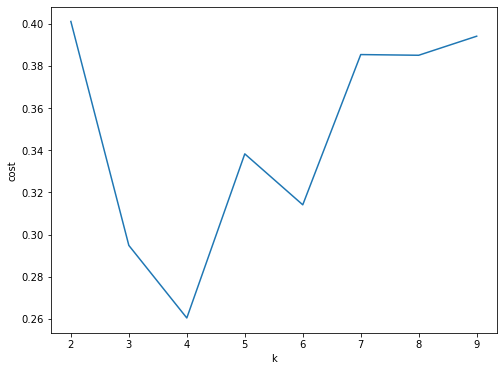

In [74]:
#Visualizing the silhouette scores in a plot
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1, figsize =(8,6))
ax.plot(range(2,10),silhouette_score)
ax.set_xlabel('k')
ax.set_ylabel('cost')

In [78]:
def first_pos(list_score):
    for ind, score in enumerate(list_score):
        if score > 0:
            return ind

In [86]:
k_n = first_pos(np.diff(silhouette_score))
k_neighbor = k_n+2
k_neighbor


4

In [87]:
silhouette_score[k_n]

0.2604325627476726

In [88]:
KMeans_algo=KMeans(featuresCol='Independent Features', k=k_neighbor)

KMeans_fit=KMeans_algo.fit(feature_output)

output=KMeans_fit.transform(feature_output)



score=evaluator.evaluate(output)

silhouette_score.append(score)
print("Number of Cluster:", 4)
print("Silhouette Score:",score)
output.show()

Number of Cluster: 4
Silhouette Score: 0.2604325627476726
+---+--------------------+----+-----+----+-------+--------------------+-----------+----+--------+----------+--------------+---------+-------------+-------------+----------------+--------+-----------+--------------------+--------------------+--------------------+----------+
| id|             address|Beds|Baths|Area|  Price|              street|   district|city|zip_code| data_date|           uid|cityIndex|districtIndex| categoryCity|categoryDistrict|Area_vec|  Price_vec|         Area_scaled|        Price_scaled|Independent Features|prediction|
+---+--------------------+----+-----+----+-------+--------------------+-----------+----+--------+----------+--------------+---------+-------------+-------------+----------------+--------+-----------+--------------------+--------------------+--------------------+----------+
|229|2648 N  43rd Ave ...|   3|    1| 957| 179990|2648 N  43rd Ave #9A|    Phoenix|  AZ|   85009|2023-05-10|2023-05-10_2

In [89]:
pdf = output.toPandas()
pdf.head()

C:\Users\kana\Anaconda3\envs\tensorflow_env\lib\site-packages\pyspark\sql\pandas\conversion.py:114: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.pyspark.enabled' is set to true; however, failed by the reason below:
  Unsupported type in conversion to Arrow: VectorUDT()
Attempting non-optimization as 'spark.sql.execution.arrow.pyspark.fallback.enabled' is set to true.
  warn(msg)


,id,address,Beds,Baths,Area,Price,street,district,city,zip_code,...,cityIndex,districtIndex,categoryCity,categoryDistrict,Area_vec,Price_vec,Area_scaled,Price_scaled,Independent Features,prediction
0,229,"2648 N 43rd Ave #9A, Phoenix, AZ 85009",3,1,957,179990,2648 N 43rd Ave #9A,Phoenix,AZ,85009,...,0.0,22.0,"(1.0, 0.0, 0.0, 0.0)","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",[957.0],[179990.0],[0.12910798122065728],[0.05309579200848945],"(3.0, 1.0, 0.12910798122065728, 0.053095792008...",3
1,125,"2405 E Fairmount Ave, Phoenix, AZ 85016",2,1,1374,1300000,2405 E Fairmount Ave,Phoenix,AZ,85016,...,0.0,22.0,"(1.0, 0.0, 0.0, 0.0)","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",[1374.0],[1300000.0],[0.26894701542588867],[0.5102240724868372],"(2.0, 1.0, 0.26894701542588867, 0.510224072486...",2
2,6,"2133 W Turney Ave #75A, Phoenix, AZ 85015",3,2,1080,210000,2133 W Turney Ave #75A,Phoenix,AZ,85015,...,0.0,22.0,"(1.0, 0.0, 0.0, 0.0)","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",[1080.0],[210000.0],[0.170355466130114],[0.06534427166238113],"(3.0, 2.0, 0.170355466130114, 0.06534427166238...",3
3,4,"14002 N 49th Ave #1094, Glendale, AZ 85306",3,2,1184,300000,14002 N 49th Ave #1094,Glendale,AZ,85306,...,0.0,8.0,"(1.0, 0.0, 0.0, 0.0)","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...",[1184.0],[300000.0],[0.20523138832997986],[0.10207746622586833],"(3.0, 2.0, 0.20523138832997986, 0.102077466225...",3
4,1,"6240 N 16th St #42, Phoenix, AZ 85016",2,2,1191,239000,6240 N 16th St #42,Phoenix,AZ,85016,...,0.0,22.0,"(1.0, 0.0, 0.0, 0.0)","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",[1191.0],[239000.0],[0.20757880617035546],[0.07718052324394922],"(2.0, 2.0, 0.20757880617035546, 0.077180523243...",3


In [94]:
table_id = "test"

sql = """ SELECT * FROM {}""".format(table_id)

In [95]:
sql

' SELECT * FROM test'

In [98]:
output.show()

+---+--------------------+----+-----+----+-------+--------------------+-----------+----+--------+----------+--------------+---------+-------------+-------------+----------------+--------+-----------+--------------------+--------------------+--------------------+----------+
| id|             address|Beds|Baths|Area|  Price|              street|   district|city|zip_code| data_date|           uid|cityIndex|districtIndex| categoryCity|categoryDistrict|Area_vec|  Price_vec|         Area_scaled|        Price_scaled|Independent Features|prediction|
+---+--------------------+----+-----+----+-------+--------------------+-----------+----+--------+----------+--------------+---------+-------------+-------------+----------------+--------+-----------+--------------------+--------------------+--------------------+----------+
|229|2648 N  43rd Ave ...|   3|    1| 957| 179990|2648 N  43rd Ave #9A|    Phoenix|  AZ|   85009|2023-05-10|2023-05-10_229|      0.0|         22.0|(4,[0],[1.0])| (44,[22],[1.0])|

In [ ]:
df_final = output.select("id", "address", "baths", "beds", "area", "price", "street", "district", "city", "zip_code", "data_date", "uid", "prediction")
df_final

In [102]:
df_final = output.select('id',
                        'address',
                        'Beds',
                        'Baths',
                        'Area',
                        'Price',
                        'street',
                        'district',
                        'city',
                        'zip_code',
                        'data_date',
                        'uid',
                         'prediction').toPandas()
df_final.head()

,id,address,Beds,Baths,Area,Price,street,district,city,zip_code,data_date,uid,prediction
0,229,"2648 N 43rd Ave #9A, Phoenix, AZ 85009",3,1,957,179990,2648 N 43rd Ave #9A,Phoenix,AZ,85009,2023-05-10,2023-05-10_229,3
1,125,"2405 E Fairmount Ave, Phoenix, AZ 85016",2,1,1374,1300000,2405 E Fairmount Ave,Phoenix,AZ,85016,2023-05-10,2023-05-10_125,2
2,6,"2133 W Turney Ave #75A, Phoenix, AZ 85015",3,2,1080,210000,2133 W Turney Ave #75A,Phoenix,AZ,85015,2023-05-10,2023-05-10_6,3
3,4,"14002 N 49th Ave #1094, Glendale, AZ 85306",3,2,1184,300000,14002 N 49th Ave #1094,Glendale,AZ,85306,2023-05-10,2023-05-10_4,3
4,1,"6240 N 16th St #42, Phoenix, AZ 85016",2,2,1191,239000,6240 N 16th St #42,Phoenix,AZ,85016,2023-05-10,2023-05-10_1,3


In [99]:
output.columns

['id',
 'address',
 'Beds',
 'Baths',
 'Area',
 'Price',
 'street',
 'district',
 'city',
 'zip_code',
 'data_date',
 'uid',
 'cityIndex',
 'districtIndex',
 'categoryCity',
 'categoryDistrict',
 'Area_vec',
 'Price_vec',
 'Area_scaled',
 'Price_scaled',
 'Independent Features',
 'prediction']

In [126]:
import time
from datetime import datetime
import pytz
import pandas as pd
import pandas_gbq
import numpy as np
import urllib.parse
from google.cloud import bigquery
from google.oauth2 import service_account
import pyspark
import pyspark.pandas as ps
from pyspark.sql import SparkSession
from pyspark.sql.types import StringType, DateType, FloatType, IntegerType
from pyspark.sql.functions import percentile_approx
from pyspark.ml.feature import StringIndexer
from pyspark.ml.feature import OneHotEncoder
from pyspark.ml import Pipeline
from pyspark.ml.feature import MinMaxScaler
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator


credentials = service_account.Credentials.from_service_account_file(r"latihan-345909-89e4eb39e2b1.json")
project_id = 'latihan-345909'
table_id_src = 'latihan-345909.real_estate.trulia'
table_id_target = 'latihan-345909.real_estate.trulia_clustered'

spark = SparkSession.builder.appName('pyspark').getOrCreate()
spark.conf.set("spark.sql.execution.arrow.enabled", "true")

def spark_preparation(table_id_src, table_name):
    try:

        client = bigquery.Client(credentials=credentials, project=project_id)

        sql = """SELECT * FROM {}""".format(table_id_src)

        bq_df = client.query(sql).to_dataframe()
        
        
        #Initiate Spark
        spark = SparkSession.getActiveSession()
        sparkDF=spark.createDataFrame(bq_df) 
        
        sparkDF = sparkDF \
            .withColumn("beds", sparkDF["beds"].cast(IntegerType()))   \
            .withColumn("baths", sparkDF["baths"].cast(IntegerType()))   \
            .withColumn("area" , sparkDF["area"].cast(IntegerType()))   \
            .withColumn("price", sparkDF["price"].cast(IntegerType()))
        
        df_clean = sparkDF
        
        #Remove OUTLIER
        
        #Check the Outlier Beds
        q1_beds = df_clean.select(percentile_approx("beds", [0.25], 1000000).alias("quantiles")).collect()[0]['quantiles'][0]
        q3_beds = df_clean.select(percentile_approx("beds", [0.75], 1000000).alias("quantiles")).collect()[0]['quantiles'][0]
        iqr_beds = q3_beds - q1_beds
        top_outlier_beds = q3_beds + 1.5 * iqr_beds
        bottom_outlier_beds= q1_beds - 1.5 * iqr_beds

        
        #Check the Outlier Baths
        q1_baths = df_clean.select(percentile_approx("baths", [0.25], 1000000).alias("quantiles")).collect()[0]['quantiles'][0]
        q3_baths = df_clean.select(percentile_approx("baths", [0.75], 1000000).alias("quantiles")).collect()[0]['quantiles'][0]
        iqr_baths = q3_baths - q1_baths
        top_outlier_baths = q3_baths + 1.5 * iqr_baths
        bottom_outlier_baths = q1_baths - 1.5 * iqr_baths

        #Check the Outlier Area
        q1_area = df_clean.select(percentile_approx("area", [0.25], 1000000).alias("quantiles")).collect()[0]['quantiles'][0]
        q3_area = df_clean.select(percentile_approx("area", [0.75], 1000000).alias("quantiles")).collect()[0]['quantiles'][0]
        iqr_area = q3_area - q1_area
        top_outlier_area = q3_area + 1.5 * iqr_area
        bottom_outlier_area = q1_area - 1.5 * iqr_area
        
        #Check the Outlier Price
        q1_price = df_clean.select(percentile_approx("price", [0.25], 1000000).alias("quantiles")).collect()[0]['quantiles'][0]
        q3_price = df_clean.select(percentile_approx("price", [0.75], 1000000).alias("quantiles")).collect()[0]['quantiles'][0]
        iqr_price = q3_price - q1_price
        top_outlier_price = q3_price + 1.5 * iqr_price
        bottom_outlier_price = q1_price - 1.5 * iqr_price
        
        df_clean = df_clean.filter(df_clean['beds']<=top_outlier_beds)
        df_clean = df_clean.filter(df_clean['baths']<=top_outlier_baths)
        df_clean = df_clean.filter(df_clean['area']<=top_outlier_area)
        df_clean = df_clean.filter(df_clean['price']<=top_outlier_price) 
        
        df = df_clean.dropDuplicates(["beds", "baths", "area", "price", "district", "city"])
        df.createOrReplaceTempView(table_name)
        return df

    except Exception as e:
        print("Preparing Data Error: " + str(e))




def spark_clustering(table_name, table_target):
    try:
        spark = SparkSession.getActiveSession()
        
        query = "select * from {}".format(table_name)
        df_selected = spark.sql(query)

        #Indexing the string column
        indexer = StringIndexer(inputCols=["city", "district"], 
                            outputCols=["cityIndex", "districtIndex"], 
                            stringOrderType="alphabetAsc")
        indexed = indexer.fit(df_selected).transform(df_selected)

        #OHE the string column
        encoder = OneHotEncoder(inputCols=["cityIndex", "districtIndex"],
                            outputCols=["categoryCity", "categoryDistrict"])
        model = encoder.fit(indexed)
        encoded = model.transform(indexed)

        #Scale integer column
        columns_to_scale = ["area", "price"]
        assemblers = [VectorAssembler(inputCols=[col], outputCol=col + "_vec") for col in columns_to_scale]
        scalers = [MinMaxScaler(inputCol=col + "_vec", outputCol=col + "_scaled") for col in columns_to_scale]
        pipeline = Pipeline(stages=assemblers + scalers)
        scalerModel = pipeline.fit(encoded)
        scaledData = scalerModel.transform(encoded)

        #Make all feature into a vector
        featureassembler=VectorAssembler(inputCols=['beds', 'baths', 'area_scaled', 'price_scaled', 'categoryCity', 'categoryDistrict'],
                                     outputCol="Independent Features")
        feature_output=featureassembler.transform(scaledData)

        #Calculate the best k for kmeans
        silhouette_score=[]
        evaluator = ClusteringEvaluator(predictionCol='prediction', featuresCol='Independent Features', \
                                        metricName='silhouette', distanceMeasure='squaredEuclidean')
        for i in range(2,10):
            KMeans_algo=KMeans(featuresCol='Independent Features', k=i)
            KMeans_fit=KMeans_algo.fit(feature_output)
            output=KMeans_fit.transform(feature_output)
            score=evaluator.evaluate(output)
            silhouette_score.append(score)

        def first_pos(list_score):
            for ind, score in enumerate(list_score):
                if score > 0:
                    return ind

        k_n = first_pos(np.diff(silhouette_score))
        k_neighbor = k_n+2
        k_neighbor

        KMeans_algo=KMeans(featuresCol='Independent Features', k=k_neighbor)
        KMeans_fit=KMeans_algo.fit(feature_output)
        output=KMeans_fit.transform(feature_output)
        score=evaluator.evaluate(output)

        print("Number of Cluster:", k_neighbor)
        print("Silhouette Score:", score)
        
        output.createOrReplaceTempView(table_target)
        return output

    except Exception as e:
        print("Building Model Error: " + str(e))

def fetch_data(table_name, table_id_target, project_id):
    try:
        spark = SparkSession.getActiveSession()
        client = bigquery.Client(credentials=credentials, project=project_id)
        
        query = "select * from {}".format(table_name)
        output = spark.sql(query)
        
        df_final = output.select("id", "address", "baths", "beds", "area", "price", "street", "district", "city", "zip_code", "data_date", "uid", "prediction").toPandas()
        df_final['id'] = df_final['id'].astype('str')
        df_final['prediction'] = df_final['prediction'].astype('str')
        
        job_config = bigquery.job.LoadJobConfig()
        job_config.write_disposition = bigquery.WriteDisposition.WRITE_TRUNCATE
        
        job = client.load_table_from_dataframe(df_final, table_id_target, job_config=job_config)
        job.result()
        spark.stop()

        print("There are {0} rows processed successfully".format(len(df_final)))
    
    except Exception as e:
        print("Fetching dataa error: " + str(e))



In [127]:
test = spark_preparation(table_id_src, "cleaned_data")
test

DataFrame[id: string, address: string, beds: int, baths: int, area: int, price: int, street: string, district: string, city: string, zip_code: string, data_date: date, uid: string]

In [128]:
test.show()

+----+--------------------+----+-----+----+------+--------------------+----------+----+--------+----------+---------------+
|  id|             address|beds|baths|area| price|              street|  district|city|zip_code| data_date|            uid|
+----+--------------------+----+-----+----+------+--------------------+----------+----+--------+----------+---------------+
|1915|1831 W  Mulberry ...|   1|    1| 576|165000|1831 W  Mulberry ...|   Phoenix|  AZ|   85015|2023-05-10|2023-05-10_1915|
|1971|14203 N  19th Ave...|   1|    1| 579|190000|14203 N  19th Ave...|   Phoenix|  AZ|   85023|2023-05-10|2023-05-10_1971|
|2601|2606 W  Berridge ...|   1|    1| 600|108000|2606 W  Berridge ...|   Phoenix|  AZ|   85017|2023-05-10|2023-05-10_2601|
|1896|Champion Burleson...|   1|    1| 644| 65899|Champion Burleson...|   Phoenix|  AZ|   85032|2023-05-10|2023-05-10_1896|
|1914|4554 E  Paradise ...|   1|    1| 685|220000|4554 E  Paradise ...|   Phoenix|  AZ|   85032|2023-05-10|2023-05-10_1914|
|2030|67

In [129]:
test_clustered = spark_clustering("cleaned_data", "clustered_data")

Number of Cluster: 3
Silhouette Score: 0.266262345548682


In [130]:
test_clustered.show()

+----+--------------------+----+-----+----+------+--------------------+----------+----+--------+----------+---------------+---------+-------------+-------------+----------------+--------+----------+--------------------+--------------------+--------------------+----------+
|  id|             address|beds|baths|area| price|              street|  district|city|zip_code| data_date|            uid|cityIndex|districtIndex| categoryCity|categoryDistrict|area_vec| price_vec|         area_scaled|        price_scaled|Independent Features|prediction|
+----+--------------------+----+-----+----+------+--------------------+----------+----+--------+----------+---------------+---------+-------------+-------------+----------------+--------+----------+--------------------+--------------------+--------------------+----------+
|1915|1831 W  Mulberry ...|   1|    1| 576|165000|1831 W  Mulberry ...|   Phoenix|  AZ|   85015|2023-05-10|2023-05-10_1915|      0.0|         80.0|(6,[0],[1.0])|(129,[80],[1.0])| [5

In [131]:
fetch_data("clustered_data", table_id_target, project_id)

There are 2963 rows processed successfully
